In [2]:
import stata_setup
import pandas as pd
stata_setup.config("/Applications/STATA","se")


  ___  ____  ____  ____  ____ ®
 /__    /   ____/   /   ____/      17.0
___/   /   /___/   /   /___/       SE—Standard Edition

 Statistics and Data Science       Copyright 1985-2021 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-STATA-PC        https://www.stata.com
                                   979-696-4600        stata@stata.com

Stata license: Unlimited-user, expiring 31 Aug 2023
Serial number: 401709320927
  Licensed to: Bruno Komel
               University of Pittsburgh

Notes:
      1. Unicode is supported; see help unicode_advice.
      2. Maximum number of variables is set to 5,000 but can be increased;
          see help set_maxvar.


In [3]:
%%stata 

use https://github.com/scunning1975/mixtape/raw/master/judge_fe.dta, clear
 
global judge_pre judge_pre_1 judge_pre_2 judge_pre_3 judge_pre_4 judge_pre_5 judge_pre_6 judge_pre_7 judge_pre_8
global demo black age male white 
global off      fel mis sum F1 F2 F3 F M1 M2 M3 M 
global prior priorCases priorWI5 prior_felChar  prior_guilt onePrior threePriors
global control2     day day2 day3  bailDate t1 t2 t3 t4 t5 t6
global control3 possess robbery DUI1st drugSell aggAss
global control4  $control3 $demo $prior $off



. 
. use https://github.com/scunning1975/mixtape/raw/master/judge_fe.dta, clear
(Written by R.              )

.  
. global judge_pre judge_pre_1 judge_pre_2 judge_pre_3 judge_pre_4 judge_pre_5 
> judge_pre_6 judge_pre_7 judge_pre_8

. global demo black age male white 

. global off      fel mis sum F1 F2 F3 F M1 M2 M3 M 

. global prior priorCases priorWI5 prior_felChar  prior_guilt onePrior threePri
> ors

. global control2     day day2 day3  bailDate t1 t2 t3 t4 t5 t6

. global control3 possess robbery DUI1st drugSell aggAss

. global control4  $control3 $demo $prior $off

. 


In [4]:
%%stata

* Naive OLS
* minimum controls
eststo olsa: reg guilt jail3 $control2, robust
* maximum controls
eststo olsb: reg guilt jail3 $control2 $control4 , robust




. 
. * Naive OLS
. * minimum controls
. eststo olsa: reg guilt jail3 $control2, robust
note: t1 omitted because of collinearity.

Linear regression                               Number of obs     =    331,971
                                                F(9, 331960)      =          .
                                                Prob > F          =          .
                                                R-squared         =     0.0074
                                                Root MSE          =     .49808

------------------------------------------------------------------------------
             |               Robust
       guilt | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
       jail3 |  -.0007353   .0017574    -0.42   0.676    -.0041796    .0027091
         day |  -.0000774    .000062    -1.25   0.212    -.0001988    .0000441
        day2 |   1.67e-07   2.97e-07     0

In [5]:
%%stata


** Instrumental variables estimation
* 2sls main results
* minimum controls
eststo iva: ivreg2 guilt (jail3= $judge_pre) $control2, robust first


. 
. 
. ** Instrumental variables estimation
. * 2sls main results
. * minimum controls
. eststo iva: ivreg2 guilt (jail3= $judge_pre) $control2, robust first
Warning - collinearities detected
Vars dropped:       t6 judge_pre_8

First-stage regressions
-----------------------


First-stage regression of jail3:

Statistics robust to heteroskedasticity
Number of obs =                 331971
------------------------------------------------------------------------------
             |               Robust
       jail3 | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
 judge_pre_1 |   .0101552   .0040927     2.48   0.013     .0021336    .0181769
 judge_pre_2 |   .0426613      .0051     8.36   0.000     .0326654    .0526571
 judge_pre_3 |   .0189323   .0029522     6.41   0.000     .0131461    .0247186
 judge_pre_4 |  -.0030989   .0029107    -1.06   0.287    -.0088037    .0026059
 judge_pre_5 |   .

                                         25% maximal IV size              9.93
Source: Stock-Yogo (2005).  Reproduced by permission.
NB: Critical values are for Cragg-Donald F statistic and i.i.d. errors.
------------------------------------------------------------------------------
Hansen J statistic (overidentification test of all instruments):         7.509
                                                   Chi-sq(6) P-val =    0.2763
------------------------------------------------------------------------------
Instrumented:         jail3
Included instruments: day day2 day3 bailDate t1 t2 t3 t4 t5
Excluded instruments: judge_pre_1 judge_pre_2 judge_pre_3 judge_pre_4
                      judge_pre_5 judge_pre_6 judge_pre_7
Dropped collinear:    t6 judge_pre_8
------------------------------------------------------------------------------

. 


In [6]:
%%stata

* maximum controls
eststo ivb: ivreg2 guilt (jail3= $judge_pre) $control2 $control4  , robust first


. 
. * maximum controls
. eststo ivb: ivreg2 guilt (jail3= $judge_pre) $control2 $control4  , robust fi
> rst
Warning - collinearities detected
Vars dropped:       t6 judge_pre_8

First-stage regressions
-----------------------


First-stage regression of jail3:

Statistics robust to heteroskedasticity
Number of obs =                 331971
------------------------------------------------------------------------------
             |               Robust
       jail3 | Coefficient  std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
 judge_pre_1 |   .0054151   .0036378     1.49   0.137    -.0017149    .0125451
 judge_pre_2 |   .0360596   .0045719     7.89   0.000     .0270988    .0450204
 judge_pre_3 |   .0168566   .0025771     6.54   0.000     .0118056    .0219076
 judge_pre_4 |  -.0080941   .0025342    -3.19   0.001    -.0130611   -.0031271
 judge_pre_5 |   .0059759   .0030178     1.98   0.048      .000061 


. 


In [7]:
%%stata


* JIVE main results
* jive can be installed using: net from https://www.stata-journal.com/software/sj6-3/
* net install st0108

* net install st0108 // This didn't work for me, so try the line below
* findit jive and install the st018.pkg 

* minimum controls
eststo jivea: jive guilt (jail3= $judge_pre) $control2, robust
	estadd local conts "Basic"


. 
. 
. * JIVE main results
. * jive can be installed using: net from https://www.stata-journal.com/softwar
> e/sj6-3/
. * net install st0108
. 
. * net install st0108 // This didn't work for me, so try the line below
. * findit jive and install the st018.pkg 
. 
. * minimum controls
. eststo jivea: jive guilt (jail3= $judge_pre) $control2, robust
note: t6 dropped due to collinearity
note: judge_pre_8 dropped due to collinearity

Jackknife instrumental variables regression (UJIVE1)

First-stage summary                                  Number of obs   =  331971
-------------------------                            F(  10,331960)  =  270.73
F(   7,331954)  =   35.36                            Prob > F        =  0.0000
Prob > F        =  0.0000                            R-squared       = -0.0183
R-squared       =  0.0026                            Adj R-squared   = -0.0183
                                                     Root MSE        =  0.5045

------------------------------------

In [8]:
%%stata

* maximum controls
eststo jiveb: jive guilt (jail3= $judge_pre) $control2 $control4 , robust
	estadd local conts "Full"


. 
. * maximum controls
. eststo jiveb: jive guilt (jail3= $judge_pre) $control2 $control4 , robust
note: t6 dropped due to collinearity
note: judge_pre_8 dropped due to collinearity

Jackknife instrumental variables regression (UJIVE1)

First-stage summary                                  Number of obs   =  331971
-------------------------                            F(  36,331934)  = 1375.47
F(   7,331928)  =   42.83                            Prob > F        =  0.0000
Prob > F        =  0.0000                            R-squared       =  0.0925
R-squared       =  0.2486                            Adj R-squared   =  0.0924
                                                     Root MSE        =  0.4763

------------------------------------------------------------------------------
       guilt | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
       jail3 |   .2120002   .0755804     2.80   0

In [9]:
%%stata

global latex "/Users/brunokomel/Library/CloudStorage/Dropbox/Apps/Overleaf/Recitation - Tables"
cd "${latex}"

// Using this method we get pretty close results!
esttab olsa olsb using "table1.tex",  sfmt(4) b(3) se(2) keep(jail3)  label noobs compress ///
prehead("\centering") posthead("\hline \\ \multicolumn{2}{c}{\textbf{Panel A: OLS}}\\\\ [-1ex]") ///
fragment replace

esttab iv* using "table1.tex",  sfmt(4) b(3) se(2) keep(jail3)  label noobs nomtitles ///
booktabs nonumbers compress /// 
posthead("\hline \\ \multicolumn{2}{c}{\textbf{Panel B: 2SLS}}\\\\ [-1ex] ") ///
fragment append

 
esttab jive* using "table1.tex",  sfmt(4) b(3) se(2) keep(jail3)  label ///
scalars("N Observations" "conts Controls") nomtitles booktabs nonumbers  compress /// 
posthead("\hline \\ \multicolumn{2}{c}{\textbf{Panel C: JIVE}}\\\\ [-1ex] ") ///
fragment append


. 
. global latex "/Users/brunokomel/Library/CloudStorage/Dropbox/Apps/Overleaf/Re
> citation - Tables"

. cd "${latex}"
/Users/brunokomel/Library/CloudStorage/Dropbox/Apps/Overleaf/Recitation - Table
> s

. 
. // Using this method we get pretty close results!
. esttab olsa olsb using "table1.tex",  sfmt(4) b(3) se(2) keep(jail3)  label n
> oobs compress ///
> prehead("\centering") posthead("\hline \\ \multicolumn{2}{c}{\textbf{Panel A:
>  OLS}}\\\\ [-1ex]") ///
> fragment replace
(file table1.tex not found)
(output written to table1.tex)

. 
. esttab iv* using "table1.tex",  sfmt(4) b(3) se(2) keep(jail3)  label noobs n
> omtitles ///
> booktabs nonumbers compress /// 
> posthead("\hline \\ \multicolumn{2}{c}{\textbf{Panel B: 2SLS}}\\\\ [-1ex] ") 
> ///
> fragment append
(output written to table1.tex)

. 
.  
. esttab jive* using "table1.tex",  sfmt(4) b(3) se(2) keep(jail3)  label ///
> scalars("N Observations" "conts Controls") nomtitles booktabs nonumbers  comp
> ress /// 
> posth

In [ ]:
%%stata


/// Here, esttab will tell stata to compile your table
/// using creates, or overwrites, a .tex file where your table will go (it'll go to the working directory)
/// sfmt(x) will tell stata to show x characters after the decimal point 
/// for the "general table values" (catch-all)
/// b(x) will tell stata to show x characters after the decimal point for the BETA coefficients
/// se(x) will tell stata to show x characters after the decimal point for the STANDARD ERROS
/// varlabel(z " Z " ) tells stata to label, on the table, the variable z as " Z "
/// label tells stata to use the labels of the variables that have labels
/// mtitles("Col 1 " "Col 2" ...) assigns column titles to each of the estimates that you stored and appended
/// scalars("X Name of X you want" ...) tells stata to output the stored scalar/local "X" and give it 
/// the name that you want 
/// fragment tells stata that there will be more esttab's coming to append a table, and it removes some
/// automatic things (like star captions)
/// replace will automatically save over the table that you previously created
/// booktabs apparently helps format it

// noobs tells stata not to show the normal Observation count
// compress : I don't know exactly what it does, but the tables look bad without it
// posthead is some LaTex stuff that I don't really understand, but I copy and edit as I need it
// append is the key that forces these estimates into the table we previously created, and called "using ..."
// nonumbers takes out the column numbers, which we don't need because we already have them in the table above

// Here is the link to my overleaf file so you can see how I created things

// https://www.overleaf.com/read/dccpcfspcjyw



. 
. 
. coefplot ols* iv* jive*, xline(0) 

. 


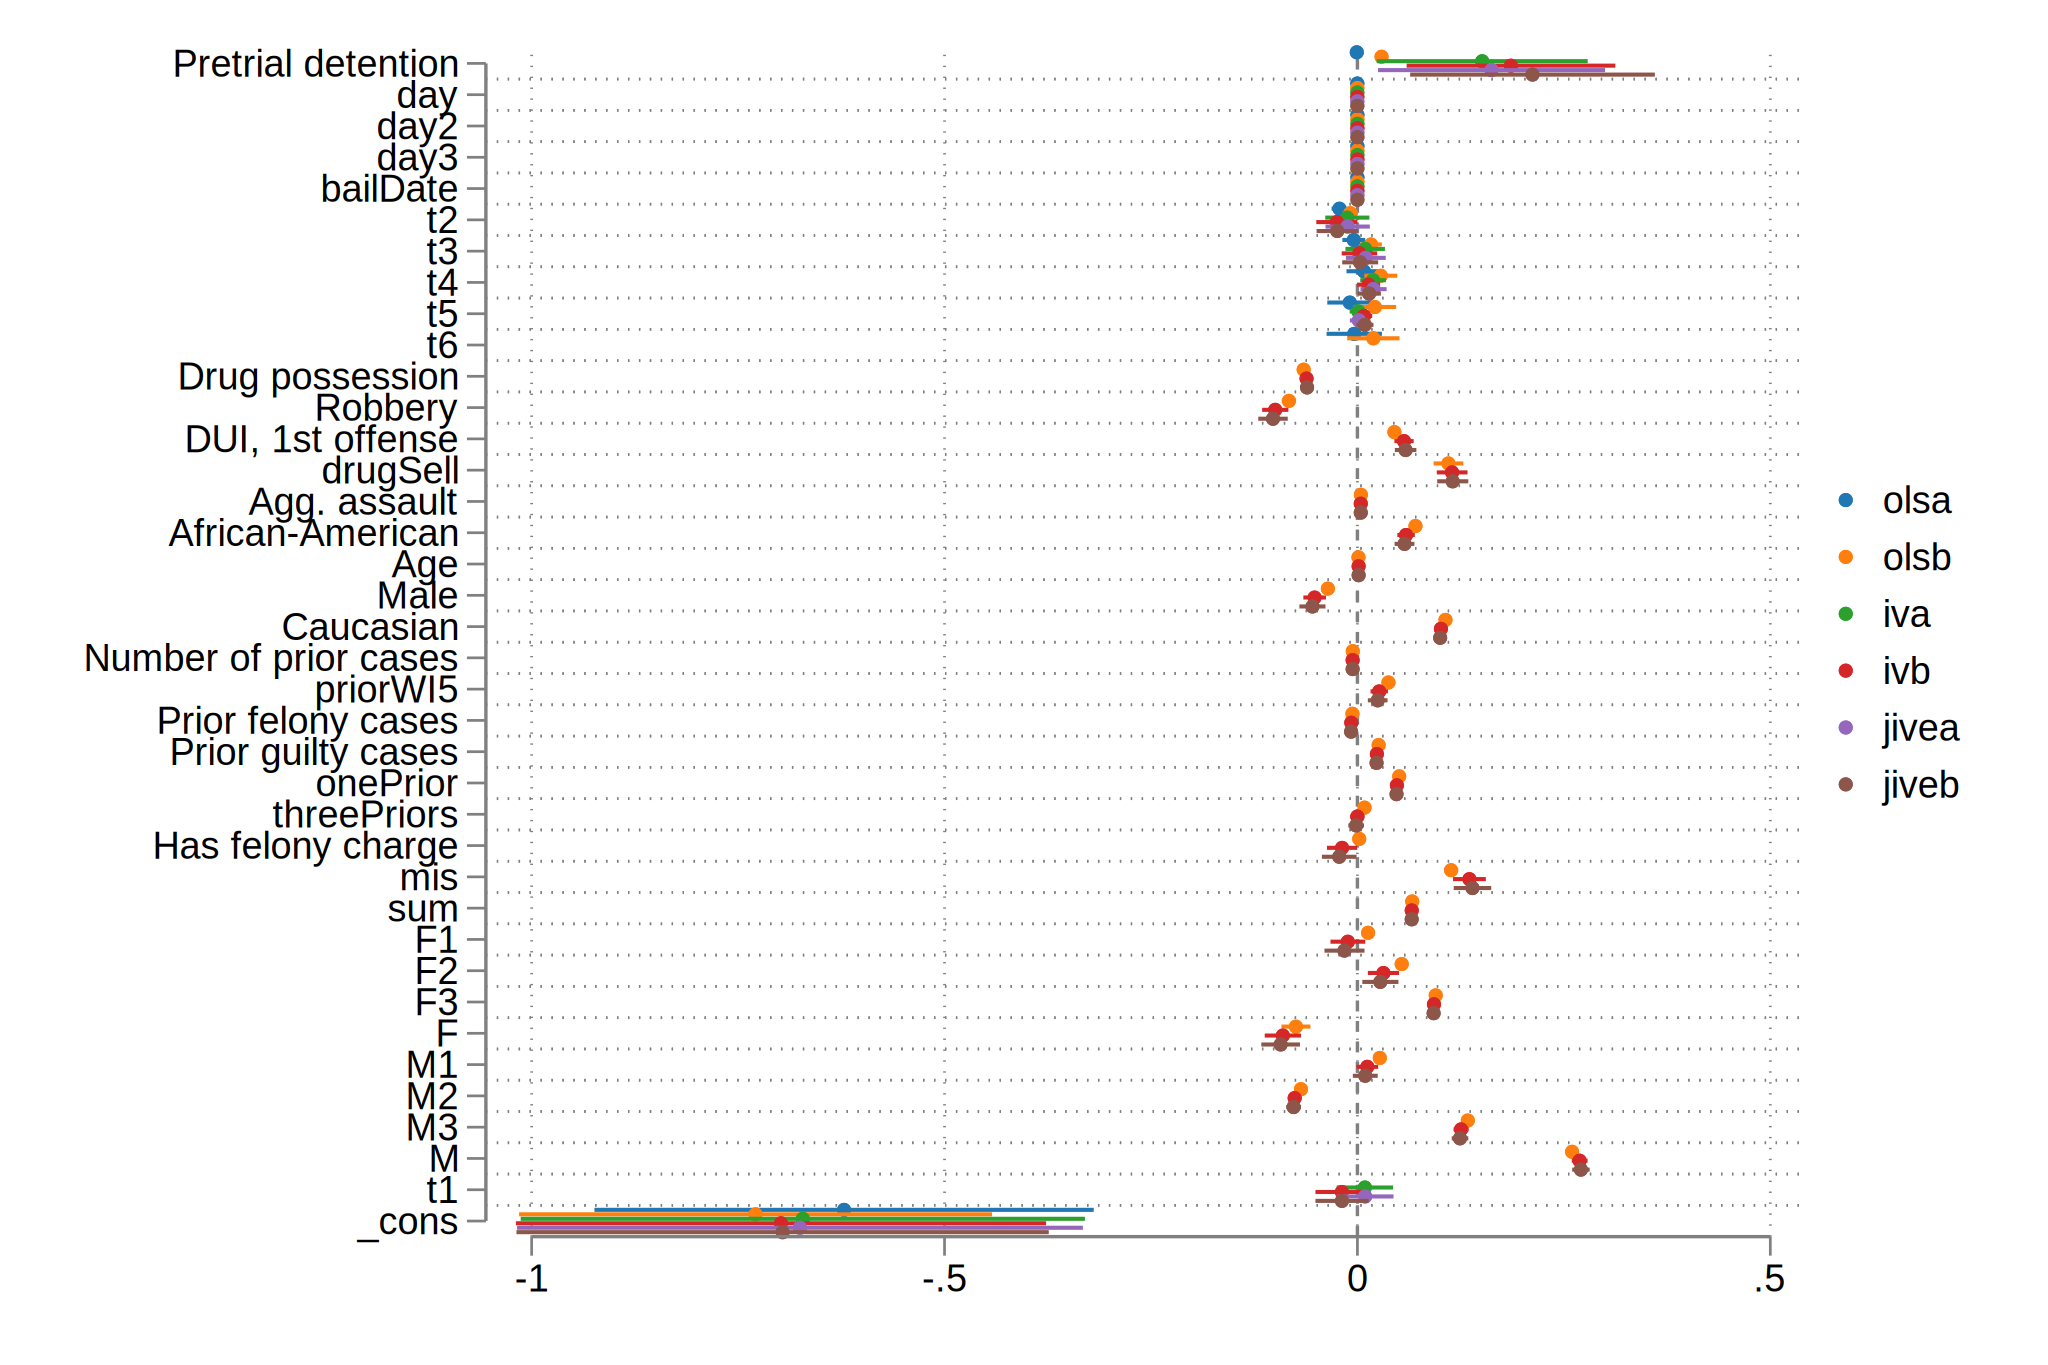

In [11]:
%%stata


coefplot ols* iv* jive*, xline(0) 


. 
. 
. coefplot ols* iv* jive*, xline(0) 

. 
. coefplot (olsa, aseq(OLS - Basic) label(OLS - Basic)) (olsb, aseq(OLS - Full)
>  label(OLS - Full)) ///
> (iva, aseq(IV - Basic)label(IV - Basic)) (ivb, aseq(IV - Full) label(IV - Ful
> l)) (jivea, aseq(JIVE - Basic) ///
> label(JIVE - Basic)) (jiveb, aseq(JIVE - Full) label(JIVE - Full)) , xline(0)
>  vertical keep(jail3)  ///
> ciopts(recast(rcap)) aseq swapnames

. 


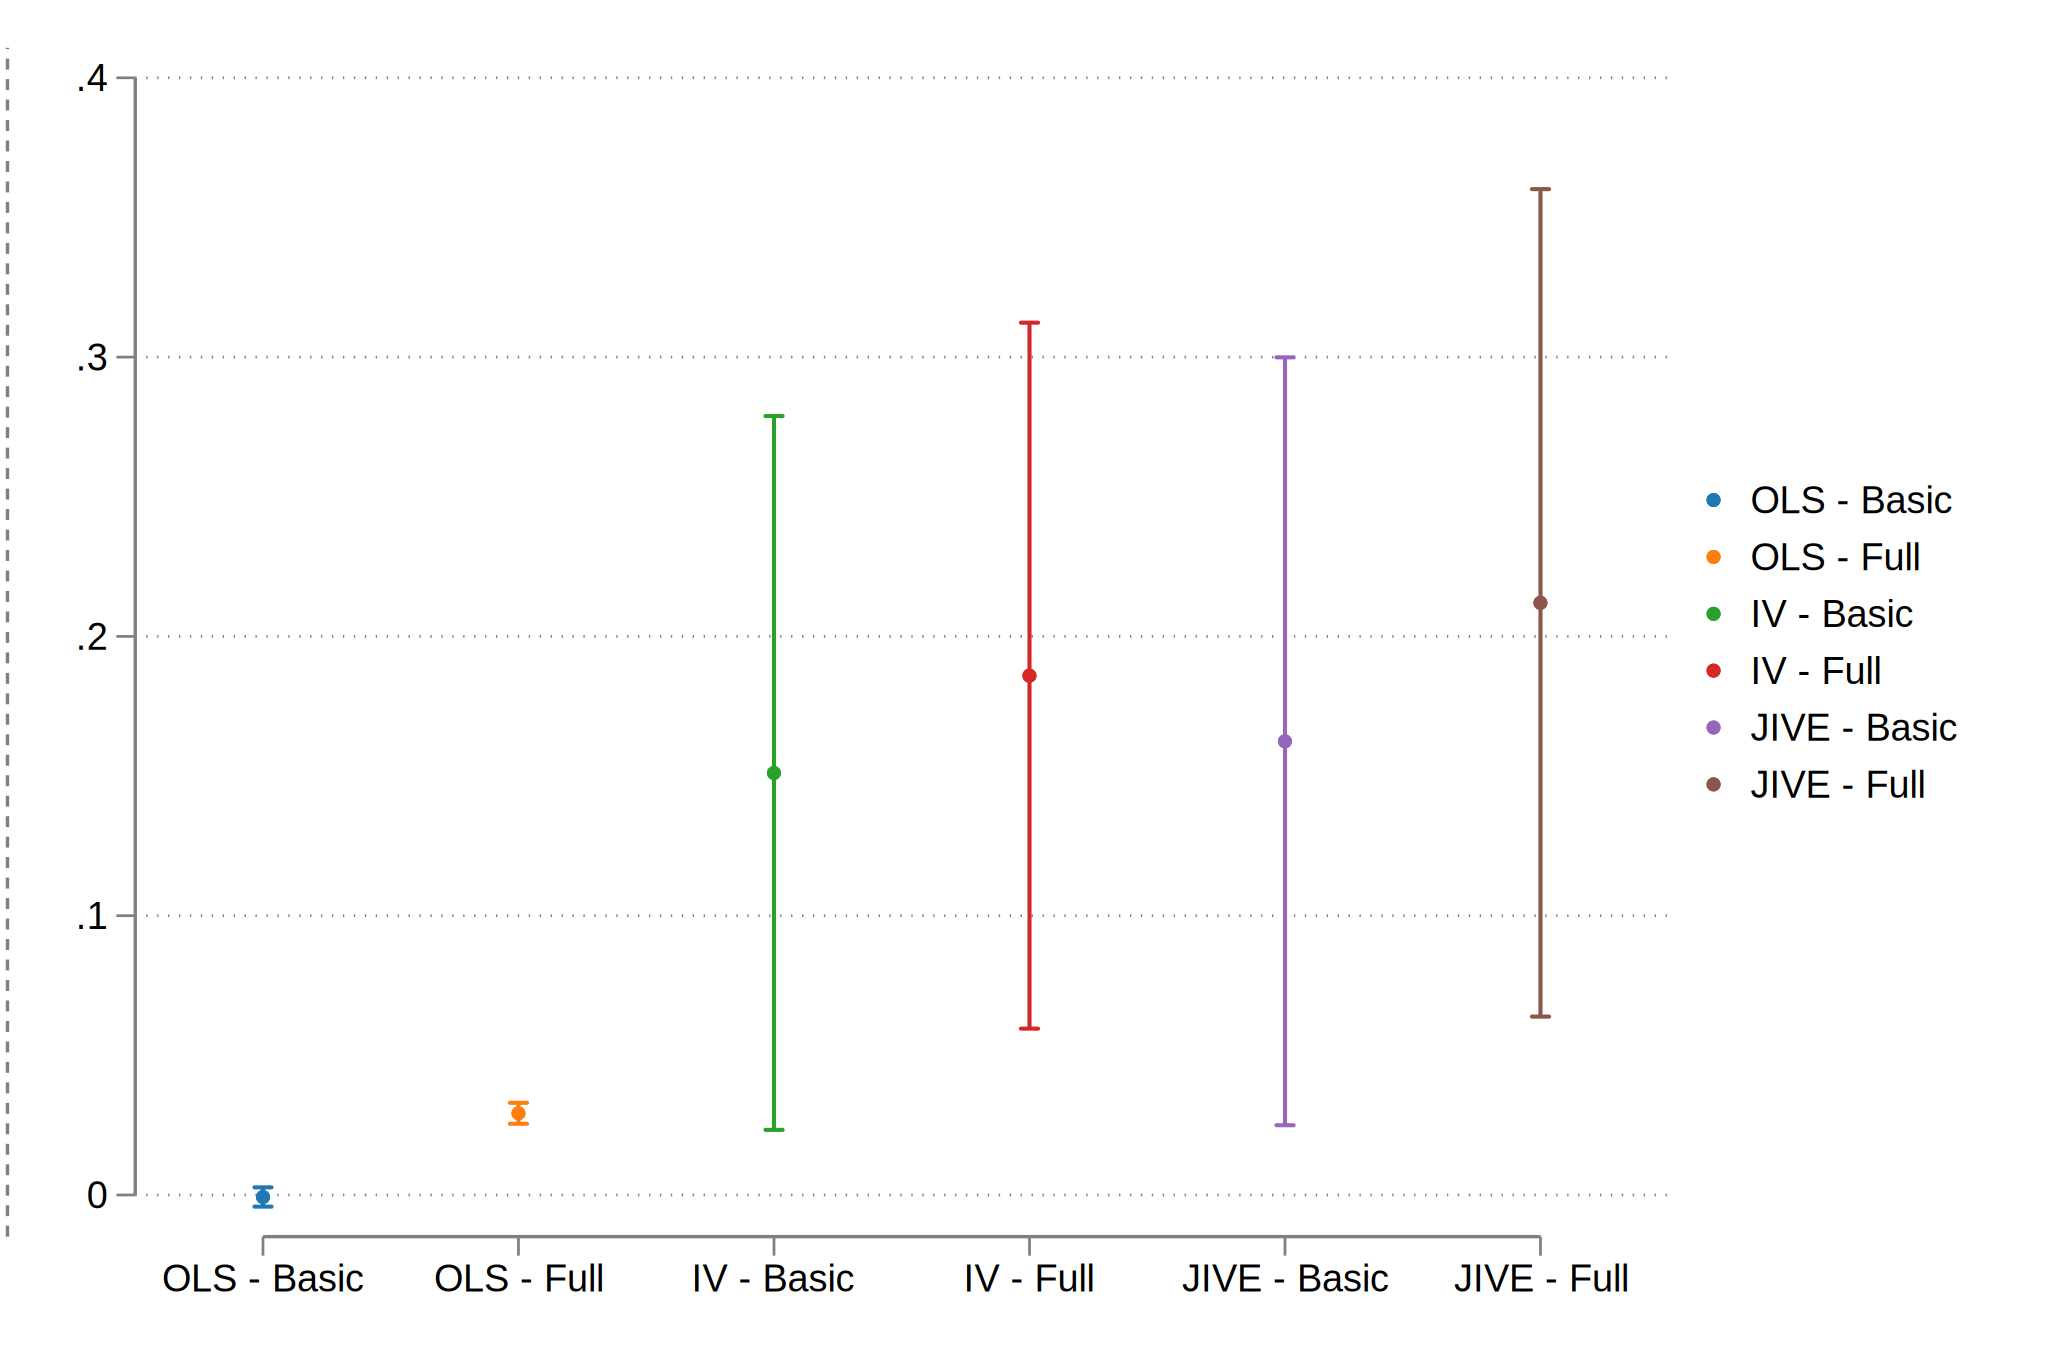

In [10]:
%%stata


coefplot ols* iv* jive*, xline(0) 

coefplot (olsa, aseq(OLS - Basic) label(OLS - Basic)) (olsb, aseq(OLS - Full) label(OLS - Full)) ///
(iva, aseq(IV - Basic)label(IV - Basic)) (ivb, aseq(IV - Full) label(IV - Full)) (jivea, aseq(JIVE - Basic) ///
label(JIVE - Basic)) (jiveb, aseq(JIVE - Full) label(JIVE - Full)) , xline(0) vertical keep(jail3)  ///
ciopts(recast(rcap)) aseq swapnames

In [12]:
%%stata 

// Above, you can see that I use aseq() and swapnames. Those are optional, but they define the labels on the 
// x axis.
// ciopts allows you to change the confidenece interval options. rcap gives it the little feet


. 
. // Above, you can see that I use aseq() and swapnames. Those are optional, bu
> t they define the labels on the 
. // x axis.
. // ciopts allows you to change the confidenece interval options. rcap gives i
> t the little feet
. 


In [ ]:
%%stata

**********************************
*                                *
*                                *
*            Exercise            *
*                                *
*                                *
**********************************


In [13]:
%%stata


eststo clear

use https://github.com/scunning1975/mixtape/raw/master/card.dta, clear

// You may find it helpful to create a global for the controls.

global controls_ed exper black south married smsa



. 
. 
. eststo clear

. 
. use https://github.com/scunning1975/mixtape/raw/master/card.dta, clear

. 
. // You may find it helpful to create a global for the controls.
. 
. global controls_ed exper black south married smsa

. 


In [14]:
%%stata


* 1. Run an OLS regression of log wages (lwage) on education (educ) controlling for experience (exper),
//race (black), region (south), marital status (married), and smsa 
* Store your estimates to put it on a table

* OLS estimate of schooling (educ) on log wages
eststo ols: reg lwage  educ  $controls_ed



. 
. 
. * 1. Run an OLS regression of log wages (lwage) on education (educ) controlli
> ng for experience (exper),
. //race (black), region (south), marital status (married), and smsa 
. * Store your estimates to put it on a table
. 
. * OLS estimate of schooling (educ) on log wages
. eststo ols: reg lwage  educ  $controls_ed

      Source |       SS           df       MS      Number of obs   =     3,003
-------------+----------------------------------   F(6, 2996)      =    219.15
       Model |  180.255137         6  30.0425229   Prob > F        =    0.0000
    Residual |  410.705979     2,996  .137084773   R-squared       =    0.3050
-------------+----------------------------------   Adj R-squared   =    0.3036
       Total |  590.961117     3,002  .196855802   Root MSE        =    .37025

------------------------------------------------------------------------------
       lwage | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+-----------------------

In [15]:
%%stata


// The stuff below is not important
* First stage regression of schooling (educ) on all covariates and the college and the county variable
reg educ nearc4 $controls_ed

* Reduced form
reg lwage nearc4 $controls_ed

* F test on the excludability of college in the county from the first stage regression.
test nearc4


. 
. 
. // The stuff below is not important
. * First stage regression of schooling (educ) on all covariates and the colleg
> e and the county variable
. reg educ nearc4 $controls_ed

      Source |       SS           df       MS      Number of obs   =     3,003
-------------+----------------------------------   F(6, 2996)      =    456.14
       Model |  10272.0963         6  1712.01605   Prob > F        =    0.0000
    Residual |  11244.7835     2,996  3.75326552   R-squared       =    0.4774
-------------+----------------------------------   Adj R-squared   =    0.4764
       Total |  21516.8798     3,002  7.16751492   Root MSE        =    1.9373

------------------------------------------------------------------------------
        educ | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
      nearc4 |   .3272826   .0824239     3.97   0.000     .1656695    .4888957
       exper |   -.40443

In [16]:
%%stata

* 2. Use proximity to school (nearc4) as an instrument for the education (educ) and find the 
// 2SLS estimate of the effect of schooling (educ) on log wages using "college in the county" as an instrument for schooling
eststo iv: ivreg2 lwage (educ=nearc4) $controls_ed, first 


. 
. * 2. Use proximity to school (nearc4) as an instrument for the education (edu
> c) and find the 
. // 2SLS estimate of the effect of schooling (educ) on log wages using "colleg
> e in the county" as an instrument for schooling
. eststo iv: ivreg2 lwage (educ=nearc4) $controls_ed, first 

First-stage regressions
-----------------------


First-stage regression of educ:

Statistics consistent for homoskedasticity only
Number of obs =                   3003
------------------------------------------------------------------------------
        educ | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
      nearc4 |   .3272826   .0824239     3.97   0.000     .1656695    .4888957
       exper |   -.404434   .0089402   -45.24   0.000    -.4219636   -.3869044
       black |  -.9475281   .0905256   -10.47   0.000    -1.125027   -.7700295
       south |  -.2973528   .0790643    -3.76   0.000    -.45

In [17]:
%%stata

* 3. Use the JIVE estimator to estimate the coefficient on education (same as part 2)
eststo jive: jive lwage (educ= nearc4) $controls_ed, robust 



. 
. * 3. Use the JIVE estimator to estimate the coefficient on education (same as
>  part 2)
. eststo jive: jive lwage (educ= nearc4) $controls_ed, robust 

Jackknife instrumental variables regression (UJIVE1)

First-stage summary                                  Number of obs   =    3003
-------------------------                            F(   6,  2996)  =  129.17
F(   1,  2996)  =   15.77                            Prob > F        =  0.0000
Prob > F        =  0.0001                            R-squared       =  0.1445
R-squared       =  0.4774                            Adj R-squared   =  0.1428
                                                     Root MSE        =  0.4109

------------------------------------------------------------------------------
       lwage | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
        educ |   .1628931    .091737     1.78   0.076    -.0169808    .3427

In [20]:
%%stata

* 4. Put your results in a table and export them to latex

global latex "/Users/brunokomel/Library/CloudStorage/Dropbox/Apps/Overleaf/Recitation - Tables"
cd "${latex}"

esttab ols iv jive using "table2.tex",  sfmt(4) b(3) se(2) keep(educ)  label   ///
star(* 0.10 ** 0.05 *** 0.01) booktabs ///
varlabel(educ "Education") mtitles("OLS" "IV" "JIVE") scalars("N Observations") ///
fragment replace


. 
. * 4. Put your results in a table and export them to latex
. 
. global latex "/Users/brunokomel/Library/CloudStorage/Dropbox/Apps/Overleaf/Re
> citation - Tables"

. cd "${latex}"
/Users/brunokomel/Library/CloudStorage/Dropbox/Apps/Overleaf/Recitation - Table
> s

. 
. esttab ols iv jive using "table2.tex",  sfmt(4) b(3) se(2) keep(educ)  label 
>   ///
> star(* 0.10 ** 0.05 *** 0.01) booktabs ///
> varlabel(educ "Education") mtitles("OLS" "IV" "JIVE") scalars("N Observations
> ") ///
> fragment replace
(file table2.tex not found)
(output written to table2.tex)

. 



. 
. * Plot the coefficients as if you were to present these results
. 
. coefplot (ols, aseq(OLS) label(OLS))  (iv, aseq(IV)label(IV)) (jive, aseq(JIV
> E) label(JIVE))  , ///
> xline(0) vertical keep(educ)  ciopts(recast(rcap)) aseq swapnames

. 
. 
. 


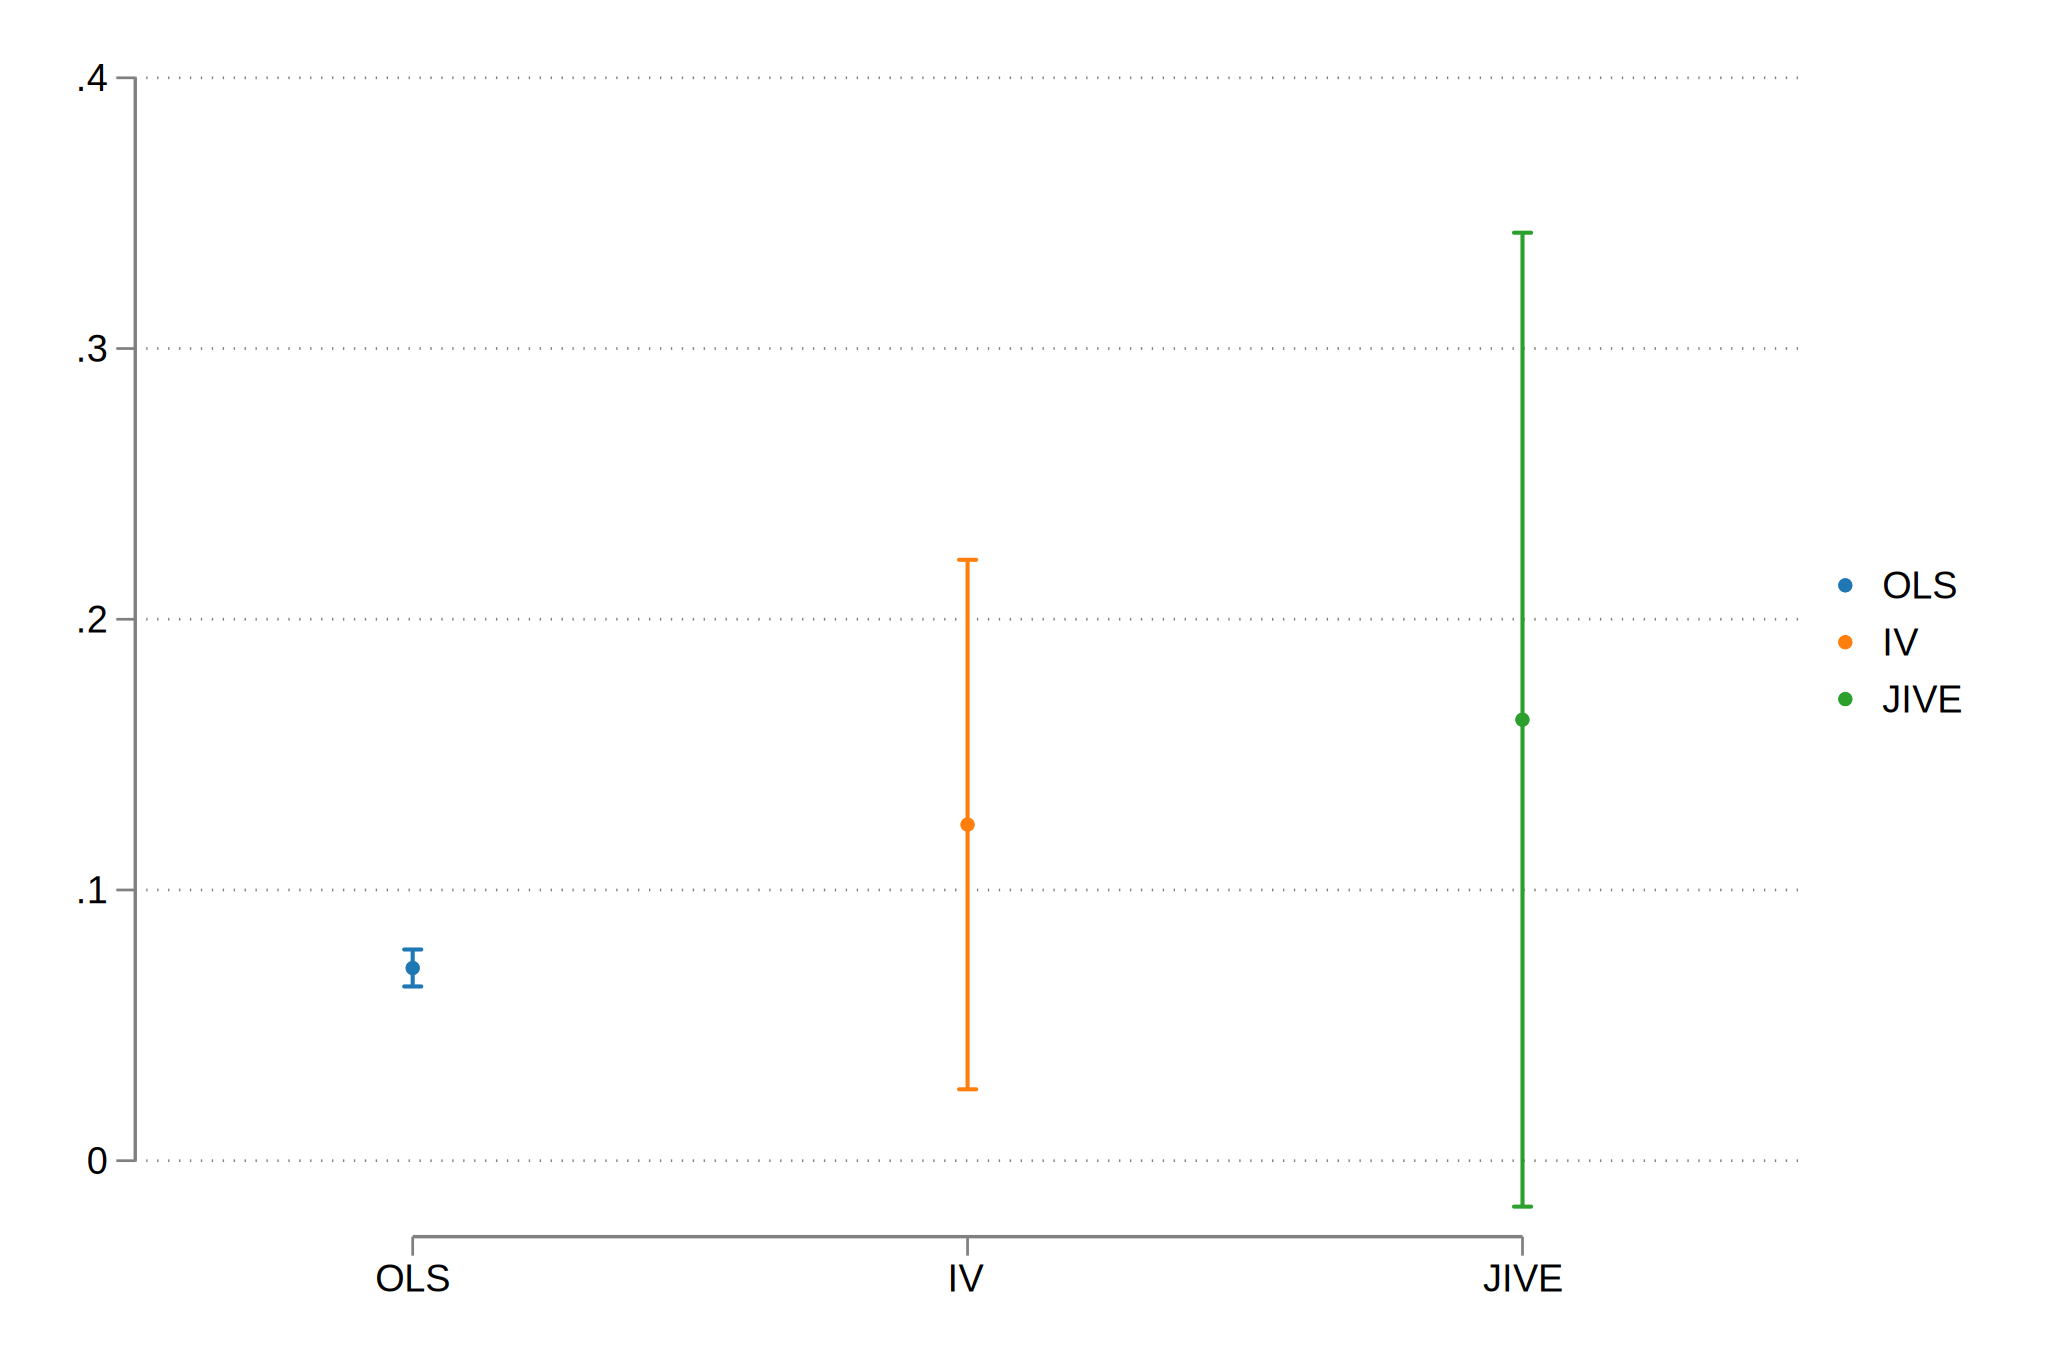

In [19]:
%%stata

* Plot the coefficients as if you were to present these results

coefplot (ols, aseq(OLS) label(OLS))  (iv, aseq(IV)label(IV)) (jive, aseq(JIVE) label(JIVE))  , ///
xline(0) vertical keep(educ)  ciopts(recast(rcap)) aseq swapnames




In [ ]:
%%stata



In [ ]:
%%stata



In [ ]:
%%stata



In [ ]:
%%stata



In [ ]:
%%stata



In [ ]:
%%stata



In [ ]:
%%stata



In [ ]:
%%stata



In [ ]:
%%stata



In [ ]:
%%stata



In [ ]:
%%stata



In [ ]:
%%stata



In [ ]:
%%stata



In [ ]:
%%stata



In [ ]:
%%stata



In [ ]:
%%stata



In [ ]:
%%stata



In [ ]:
%%stata



In [ ]:
%%stata



In [ ]:
%%stata



In [ ]:
%%stata



In [ ]:
%%stata



In [ ]:
%%stata



In [ ]:
%%stata



In [ ]:
%%stata

